In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

p = np.load('alice_mc_lorentz_jets_80_90.npy', mmap_mode='r')
labels = np.load('alice_mc_labels_80_90.npy', mmap_mode='r')
R=1
def notzero(i):
    N=0
    m=p[i][0:][0:]
    while True:
        N=N+1
        if m[N][0]<0.000001:
            break
    return p[i][0:N][0:]
        

def update(m):
    y=[0.5*math.log((m[i][0]+m[i][3])/(m[i][0]-m[i][3])) for i in range(m.shape[0])]
    pt=[np.sqrt(m[i][1]**2+m[i][2]**2) for i in range(m.shape[0])]
    azimut=[math.acos(m[i][1]/pt[i]) for i in range(m.shape[0])]
    global d
    d=np.ndarray((m.shape[0],m.shape[0]))
    for i in range(m.shape[0]):
        for j in range(m.shape[0]):
            d[i][j]=((y[i]-y[j])**2+(azimut[j]-azimut[i])**2)/R**2
        
def minimum(m):
    k=0
    l=1
    mini=m[0][1]
    for i in range(0,m.shape[0]):
        for j in range(i+1,m.shape[0]):
            if m[i][j]<mini:
                mini=m[i][j]
                k=i
                l=j
    return [k,l,mini]


def cluster(m):
    t=minimum(d)
    čestica1=t[0]
    čestica2=t[1]
    if čestica1>čestica2:
        r=čestica1
        čestica1=čestica2
        čestica2=r
    n=np.shape(m)
    b=np.ndarray((n[0]-1,4))
    s=m[čestica1]+m[čestica2]
    i=0
    j=0
    while i<m.shape[0]:
        if i==čestica1:
            b[j][:]=s
            i=i+1
            j=j+1
        elif i==čestica2:
            if i<m.shape[0]-1:
                b[j][:]=m[i+1][:]
            else:
                break
            i=i+2
            j=j+1
        else:
            b[j][:]=m[i][:]
            i=i+1
            j=j+1
    return b
                
def recluster(m):
    update(m)
    x=[]
    D=[]
    x.append(m)
    D.append(d)
    for i in range(m.shape[0]-1):
        m=cluster(m)
        update(m)
        x.append(m)
        D.append(d)
    return x,D

def decluster(x,D):
    n=len(x)
    L=[]
    i=n-2
    čes=0
    #pcut=1000
    while i>=0:
        m=minimum(D[i])
        čestica1=m[0]
        čestica2=m[1]
        if čestica2<čestica1:
            r=čestica1
            čestica1=čestica2
            čestica2=r
        if čes==čestica1:
            pt1=np.sqrt(x[i][čestica1][1]**2+x[i][čestica1][2]**2)
            pt2=np.sqrt(x[i][čestica2][1]**2+x[i][čestica2][2]**2)
            y2=0.5*math.log((x[i][čestica2][0]+x[i][čestica2][3])/(x[i][čestica2][0]-x[i][čestica2][3]))
            y1=0.5*math.log((x[i][čestica1][0]+x[i][čestica1][3])/(x[i][čestica1][0]-x[i][čestica1][3]))
            az1=math.acos(x[i][čestica1][1]/pt1)
            az2=math.acos(x[i][čestica2][1]/pt2)
            az=math.atan((y1-y2)/(az1-az2))
            
            #if pt1<pcut or pt2<pcut:
                #break
            if pt1<pt2:
                L.append([pt1*m[2],m[2],pt2*m[2],az])
                čes=čestica2
            else:
                L.append([pt2*m[2],m[2],pt1*m[2],az])
                čes=čestica1
        else:
            if čes<čestica2:
                pass
            else:
                čes=čes+1
        i=i-1
    return L

def qg(i):
    m=labels[i]
    return m


        



In [11]:
q=0
g=0
j=0
LL=[]
lb=[]
while j<500000:   
    x,D=recluster(notzero(j))
    L1=decluster(x,D)
    k1=[np.log(L1[i][0]) for i in range(len(L1))]
    d1=[np.log(1/L1[i][1]) for i in range(len(L1))]
    z=[L1[i][0]/(L1[i][0]+L1[i][2]) for i in range(len(L1))]
    yedges=[k1[i] for i in range(len(L1))]
    xedges=[d1[i] for i in range(len(L1))]
    hist,xedges,yedges=np.histogram2d(xedges,yedges,bins=len(L1),weights=z)
    hist=(hist/np.max(hist)*255).astype(int)
    LL.append(pad_image(hist))
    if labels[j]==0:
        lb.append(labels[j])
        q=q+1
    if labels[j]==1:
        lb.append(labels[j])
        g=g+1
    j=j+1
    if q>=g:
        while labels[j]!=1:
            j=j+1
        


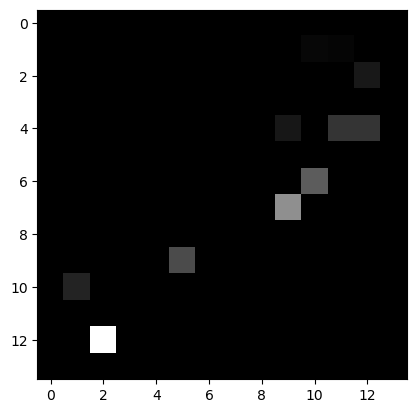

In [17]:
    j=5
    x,D=recluster(notzero(j))
    L1=decluster(x,D)
    k1=[np.log(L1[i][0]) for i in range(len(L1))]
    d1=[np.log(1/L1[i][1]) for i in range(len(L1))]
    z=[L1[i][0]/(L1[i][0]+L1[i][2]) for i in range(len(L1))]
    yedges=[k1[i] for i in range(len(L1))]
    xedges=[d1[i] for i in range(len(L1))]
    hist,xedges,yedges=np.histogram2d(xedges,yedges,bins=len(L1)+1,weights=z)
    hist=pad_image(hist)
    hist=(hist/np.max(hist)*255).astype(int)
    plt.imshow(hist,cmap='gray')

In [12]:
q=0
g=0
j=500000
LLv=[]
lbv=[]
while j<600000:   
    x,D=recluster(notzero(j))
    L1=decluster(x,D)
    k1=[np.log(L1[i][0]) for i in range(len(L1))]
    d1=[np.log(1/L1[i][1]) for i in range(len(L1))]
    z=[L1[i][0]/(L1[i][0]+L1[i][2]) for i in range(len(L1))]
    yedges=[k1[i] for i in range(len(L1))]
    xedges=[d1[i] for i in range(len(L1))]
    hist,xedges,yedges=np.histogram2d(xedges,yedges,bins=len(L1),weights=z)
    hist=(hist/np.max(hist)*255).astype(int)
    LLv.append(pad_image(hist))
    if labels[j]==0:
        lbv.append(labels[j])
        q=q+1
    if labels[j]==1:
        lbv.append(labels[j])
        g=g+1
    j=j+1
    if q>=g:
        while labels[j]!=1:
            j=j+1

In [10]:

def pad_image(image, max_size = (14,14)):
    """
    Simply pad an image with zeros up to max_size.
    """
    size = np.shape(image)
    xs=np.zeros(shape=(size[0],1))
    ys=np.zeros(shape=(1,max_size[1]))
    px, py = (max_size[0]-size[0]), (max_size[1]-size[1])
    for i in range(int(np.floor(px/2.0))):
        image=np.hstack((xs,image))
    for i in range(int(np.ceil(px/2.0))):
        image=np.hstack((image,xs))
    for i in range(int(np.floor(py/2.0))):
        image=np.vstack((ys,image))
    for i in range(int(np.ceil(py/2.0))):
        image=np.vstack((image,ys))
    return image



In [13]:
import pickle
pickle.dump( LL, open( "trainhist.pkl", "wb" ) )
pickle.dump( lb, open( "trainlabelshist.pkl", "wb" ) )
pickle.dump( LLv, open( "valshist.pkl", "wb" ) )
pickle.dump( lbv, open( "vallabelshist.pkl", "wb" ) )



In [2]:
import pickle
LL= pickle.load( open( "trainhist.pkl", "rb" ) )
LLv= pickle.load( open( "valshist.pkl", "rb" ) )
lb= pickle.load( open( "trainlabelshist.pkl", "rb" ) )
lbv= pickle.load( open( "vallabelshist.pkl", "rb" ) )

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
np.sum(labels)

172475.0

In [27]:
batch_size = 40
train_ds=tf.data.Dataset.from_tensor_slices((LL,lb)).batch(batch_size)
val_ds=tf.data.Dataset.from_tensor_slices((LLv,lbv)).batch(batch_size)

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
img_height=14
img_width=14

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width,1)),
  layers.Conv2D(32, 3,padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
    layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
    layers.Dropout(0.25),
  layers.Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 14, 14, 1)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          18496     
                                                      

In [30]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001),metrics=['accuracy'])

In [31]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [32]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("model_history_hist1_40dout.csv", append=False)

In [33]:
epochs=30
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, mode='min', verbose=1,patience=7)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[es,csv_logger]
)

Epoch 1/30
3400/3400 [==============================] - 326s 95ms/step - loss: 0.6884 - accuracy: 0.5517 - val_loss: 0.6783 - val_accuracy: 0.5742
Epoch 2/30
3400/3400 [==============================] - 317s 93ms/step - loss: 0.6783 - accuracy: 0.5748 - val_loss: 0.6736 - val_accuracy: 0.5827
Epoch 3/30
3400/3400 [==============================] - 325s 96ms/step - loss: 0.6758 - accuracy: 0.5787 - val_loss: 0.6719 - val_accuracy: 0.5853
Epoch 4/30
3400/3400 [==============================] - 325s 96ms/step - loss: 0.6745 - accuracy: 0.5814 - val_loss: 0.6709 - val_accuracy: 0.5872
Epoch 5/30
3400/3400 [==============================] - 308s 91ms/step - loss: 0.6735 - accuracy: 0.5831 - val_loss: 0.6700 - val_accuracy: 0.5899
Epoch 6/30
3400/3400 [==============================] - 311s 91ms/step - loss: 0.6726 - accuracy: 0.5844 - val_loss: 0.6693 - val_accuracy: 0.5909
Epoch 7/30
3400/3400 [==============================] - 332s 98ms/step - loss: 0.6720 - accuracy: 0.5855 - val_loss: 0

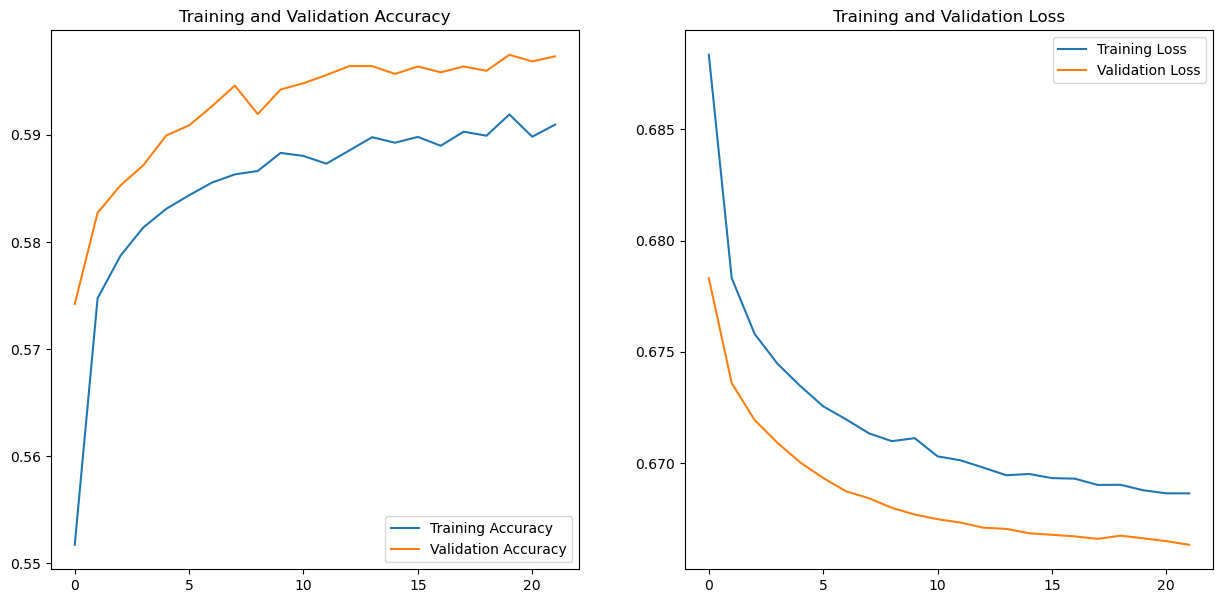

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [34]:
model.save("modelhist1_40")

INFO:tensorflow:Assets written to: modelhist1_40\assets


INFO:tensorflow:Assets written to: modelhist1_40\assets


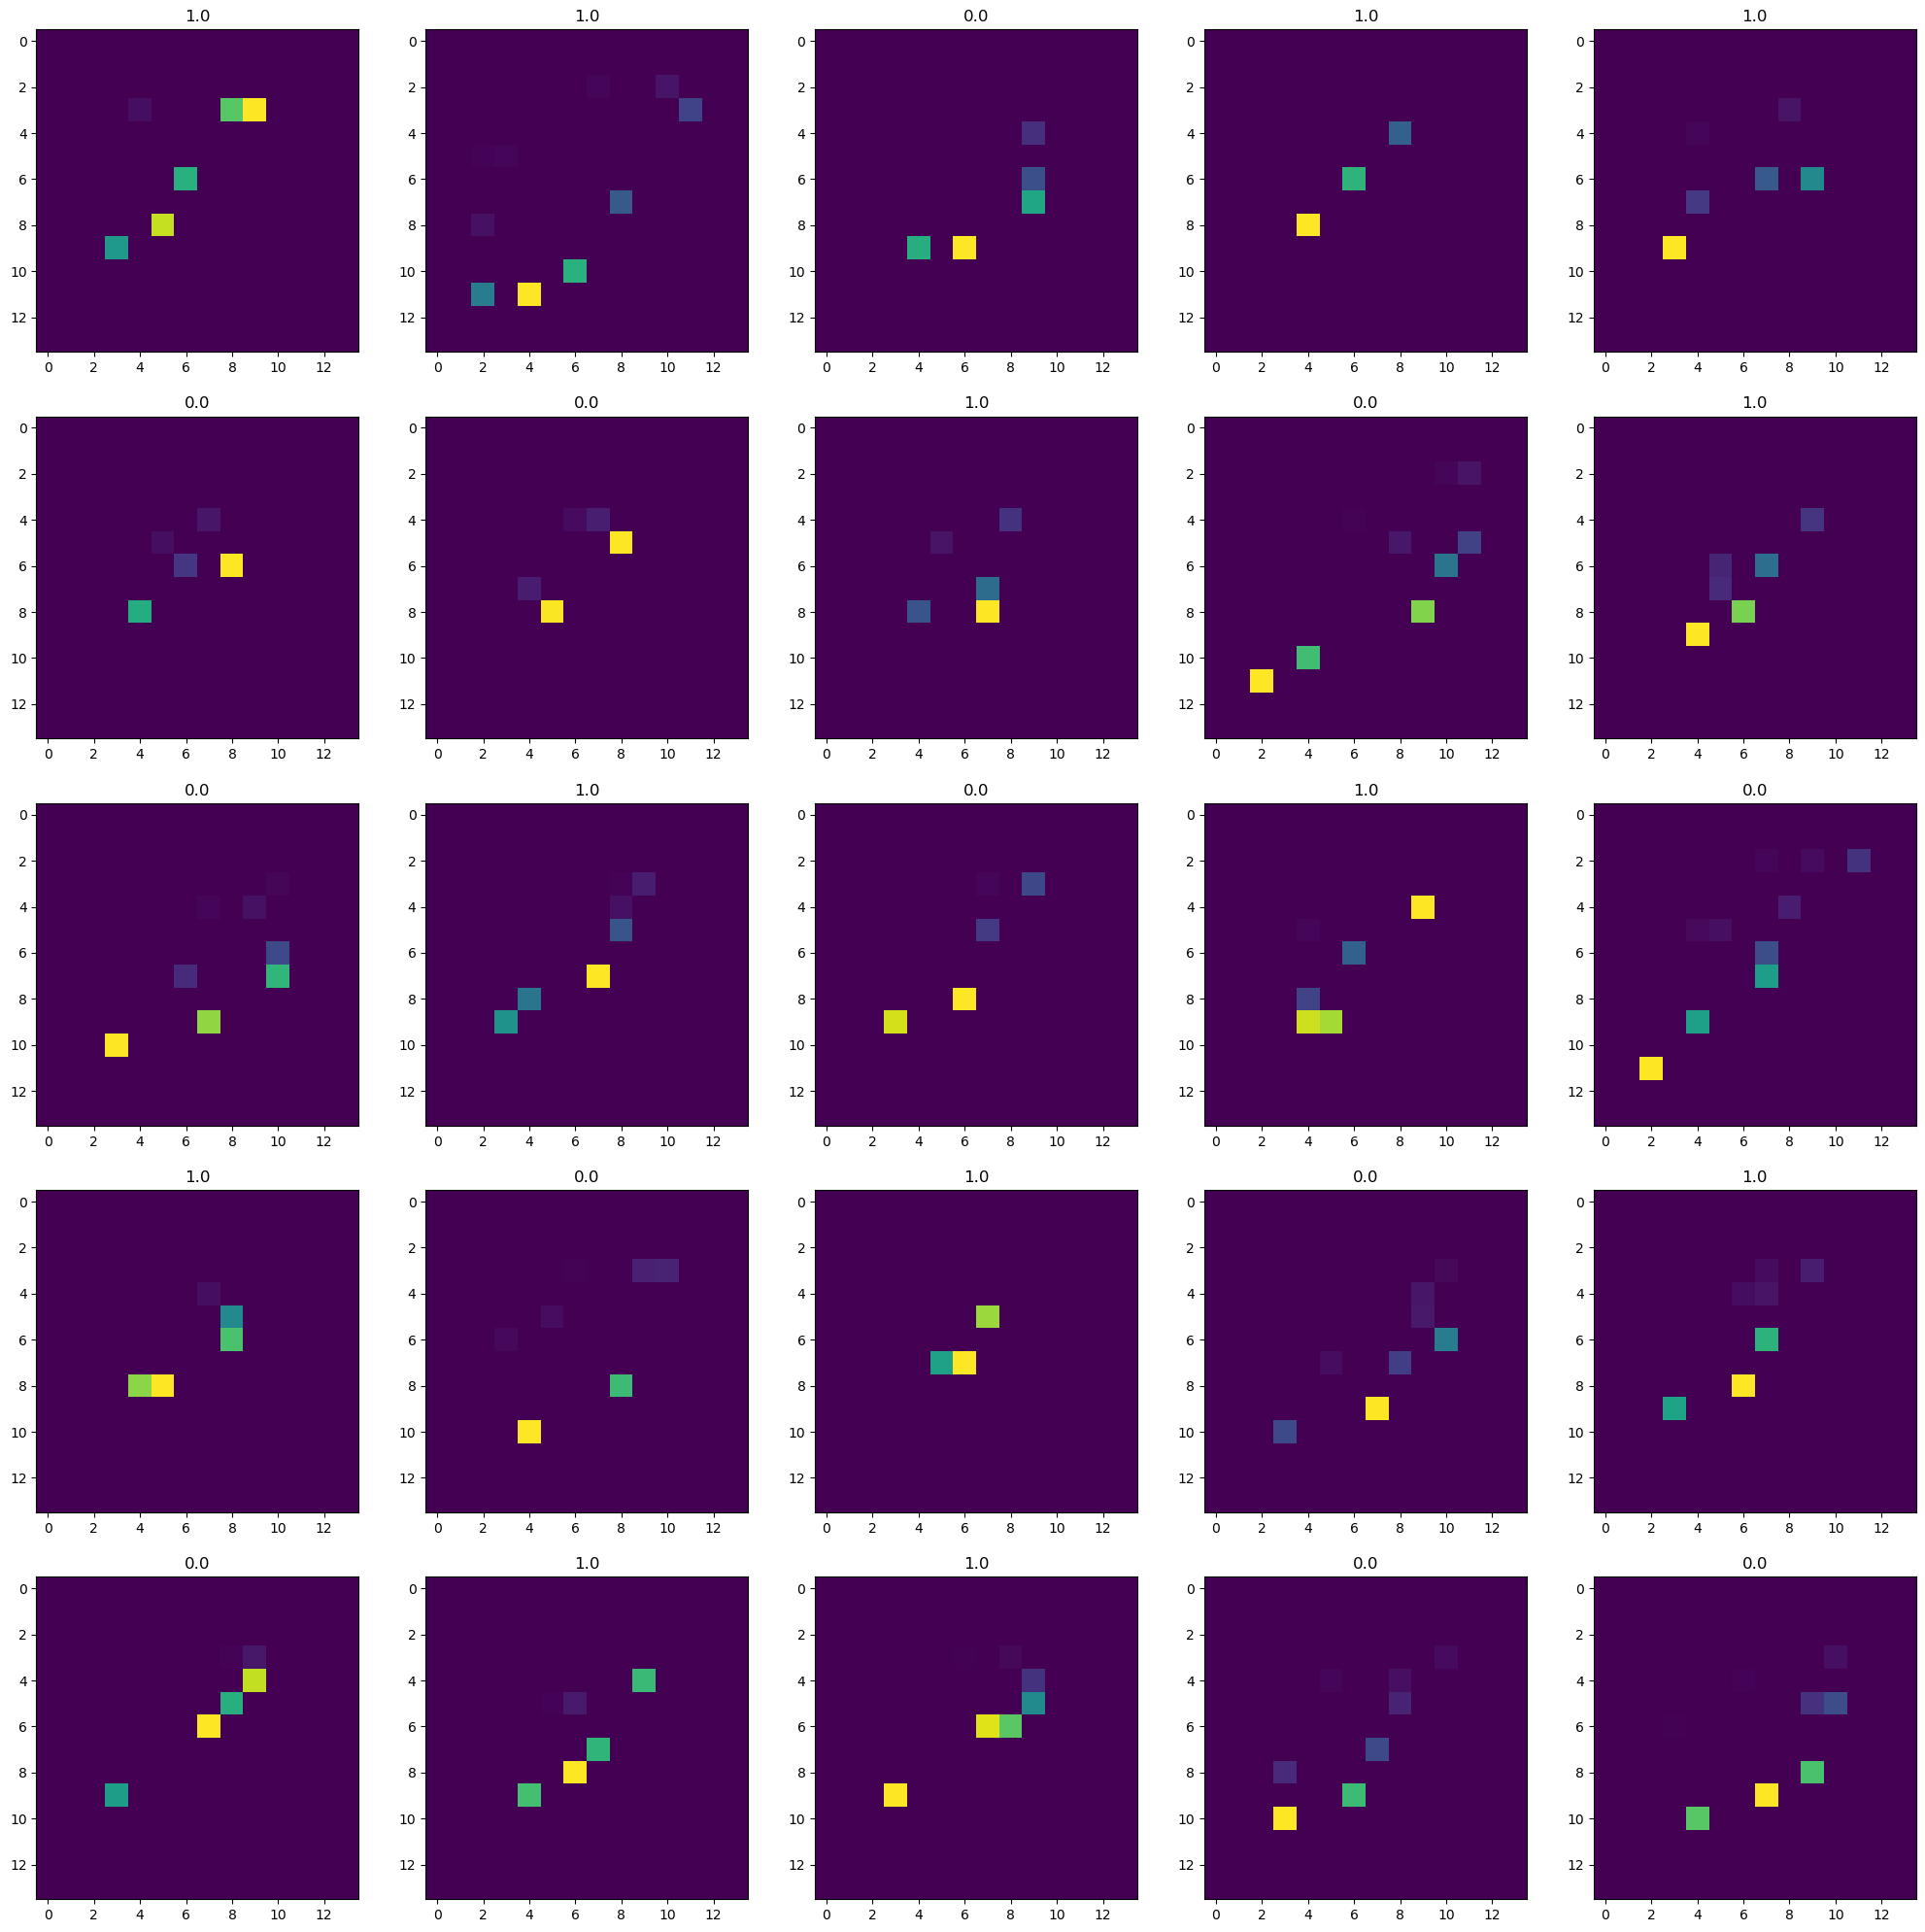

In [16]:
fig = plt.figure(figsize=((25,25)))
for i in range(1,26):
    fig.add_subplot(5,5,i)
    plt.title(lb[i])
    plt.imshow(LL[i])
plt.show()

In [ ]:
xes=[1.5,2.5,3.5,4.5,5.5]